In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(caret))
suppressMessages(library(MASS))
suppressMessages(library(car))
suppressMessages(library(dplyr))
suppressMessages(library(glmnet))
suppressMessages(library(Metrics))
suppressMessages(library(rstanarm))
suppressMessages(library(bayesplot))

Warning message:
"package 'tidyverse' was built under R version 4.3.2"
Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'tibble' was built under R version 4.3.2"
Warning message:
"package 'tidyr' was built under R version 4.3.2"
Warning message:
"package 'readr' was built under R version 4.3.2"
Warning message:
"package 'dplyr' was built under R version 4.3.2"
Warning message:
"package 'stringr' was built under R version 4.3.2"
Warning message:
"package 'forcats' was built under R version 4.3.2"
Warning message:
"package 'lubridate' was built under R version 4.3.2"
Warning message:
"package 'caret' was built under R version 4.3.3"
Warning message:
"package 'MASS' was built under R version 4.3.3"
Warning message:
"package 'car' was built under R version 4.3.3"
Warning message:
"package 'carData' was built under R version 4.3.3"
Warning message:
"package 'glmnet' was built under R version 4.3.3"
Warning message:
"package 'Matrix' was built un

In [2]:
shooting <- read.csv('Shooting_filtered.csv')
shooting <- na.omit(shooting)
shooting <- filter(shooting, Gls != 0)
shooting <- mutate(shooting, Gls = 1/Gls)

In [3]:
shooting <- filter(shooting, Sh >= 1)
shooting <- dplyr::select(shooting, -Sh.90, -SoT.90)

12 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept)  44.13758355
Age          -0.00447756
X90s          0.01352868
Sh          -10.24073114
SoT          21.20472329
SoT.         -0.75743346
G.Sh         41.02912167
G.SoT       -38.32007428
Dist          0.14531410
FK           -3.50906638
PK          -19.37676863
PKatt         2.70644542


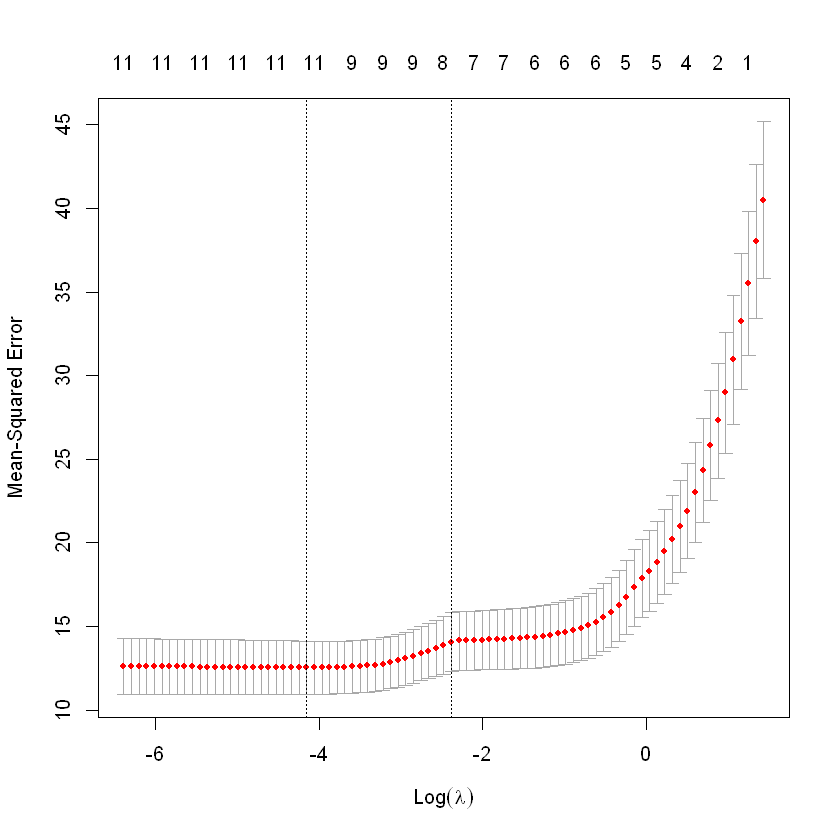

In [4]:
predictors <- shooting %>%
  dplyr::select_if(is.numeric) %>%
  dplyr::select(-Gls, -xG, -npxG, -G.xG, -np.G.xG, -npxG.Sh, -Born) %>%
  as.matrix()

response <- shooting$Gls

set.seed(1) # for reproducibility
cv.lasso <- cv.glmnet(predictors, response, alpha = 1)

lasso.model <- glmnet(predictors, response, alpha = 1, lambda = cv.lasso$lambda.min)

print(coef(lasso.model))

plot(cv.lasso)

In [5]:
# Prepare the data
set.seed(123) # for reproducibility
selected_features <- colnames(predictors)
index <- createDataPartition(shooting$Gls, p = 0.8, list = FALSE)
train_data <- shooting[index, ]
test_data <- shooting[-index, ]

# Fit the model
model <- lm(Gls ~ ., data = train_data[, c(selected_features, 'Gls')])
# Predict on the test set
predictions <- predict(model, newdata = test_data, type = "response")

# Evaluate the model
mse <- mean((test_data$Gls - predictions)^2)
r_squared <- 1 - sum((test_data$Gls - predictions)^2) / sum((test_data$Gls - mean(test_data$Gls))^2)

print(paste("MSE:", mse))
print(paste("R-squared:", r_squared))


[1] "MSE: 11.9492356277438"
[1] "R-squared: 0.727612105224251"


In [6]:
predictors <- as.data.frame(predictors)

colnames(predictors)

[1] "Age"   "X90s"  "Sh"    "SoT"   "SoT."  "G.Sh"  "G.SoT" "Dist"  "FK"   
[10] "PK"    "PKatt"

In [7]:
nrow(shooting)

[1] 490

In [8]:
nrow(predictors)

[1] 490

In [9]:
Normal <- function(mean=0, sd=1) {
  Norm(mean, sd^2)
}



SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 7.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.78 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 5.161 seconds (Warm-up)
Chain 1:                2.397 seconds (Sampling)
Chain 1:                7.558 seconds (


Model Info:
 function:     stan_glm
 family:       Gamma [inverse]
 formula:      Gls ~ Age + X90s + Sh + SoT + SoT. + PK + PKatt + FK + X90s + 
	   Dist
 algorithm:    sampling
 sample:       2000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 393
 predictors:   10

Estimates:
              mean   sd   10%   50%   90%
(Intercept)  0.4    0.0  0.3   0.4   0.4 
Age          0.0    0.0  0.0   0.0   0.0 
X90s         0.0    0.0  0.0   0.0   0.0 
Sh          -0.1    0.0 -0.1  -0.1  -0.1 
SoT          0.6    0.1  0.5   0.6   0.6 
SoT.         0.0    0.0  0.0   0.0   0.0 
PK           1.1    0.3  0.7   1.1   1.5 
PKatt        0.1    0.3 -0.2   0.1   0.4 
FK           0.0    0.0  0.0   0.0   0.0 
Dist         0.0    0.0  0.0   0.0   0.0 
shape        4.7    0.3  4.3   4.7   5.1 

Fit Diagnostics:
           mean   sd   10%   50%   90%
mean_PPD 6.7    0.3  6.4   6.7   7.1  

The mean_ppd is the sample average posterior predictive distribution of the outcome va

            2        5         6        7        8        10        11
[1,] 1.752814 4.960047  2.958049 8.274903 4.890009  3.536314  7.540891
[2,] 2.365107 9.755359  9.841270 9.788251 6.293939 12.531204 12.194056
[3,] 2.045863 8.073940  9.131008 6.136008 3.324036 12.002874 13.441145
[4,] 2.248373 5.181431 23.982685 9.740951 3.709924  7.220677  8.791783
[5,] 3.239091 2.748298  4.157896 8.336550 5.057834 10.373732 10.312148
[6,] 5.019874 5.205270 18.516201 9.129312 5.885755 12.083082  5.438141
            12       13       14       16        17       18        20       21
[1,]  4.313360 6.299649 4.935697 7.531521  6.740275 2.220198  9.301174 4.878102
[2,]  7.002536 6.510690 5.170564 5.739505  6.074372 3.703916  8.185215 7.415506
[3,] 11.316443 3.277525 3.510331 2.845848  7.679325 2.283626  6.571410 9.339444
[4,] 26.536360 3.162797 6.472134 5.617283  5.501802 2.797643 16.938366 7.454704
[5,] 14.009734 1.935617 5.334913 5.738931  6.987148 3.153501 14.428448 1.876266
[6,]  5.370149 2.629450

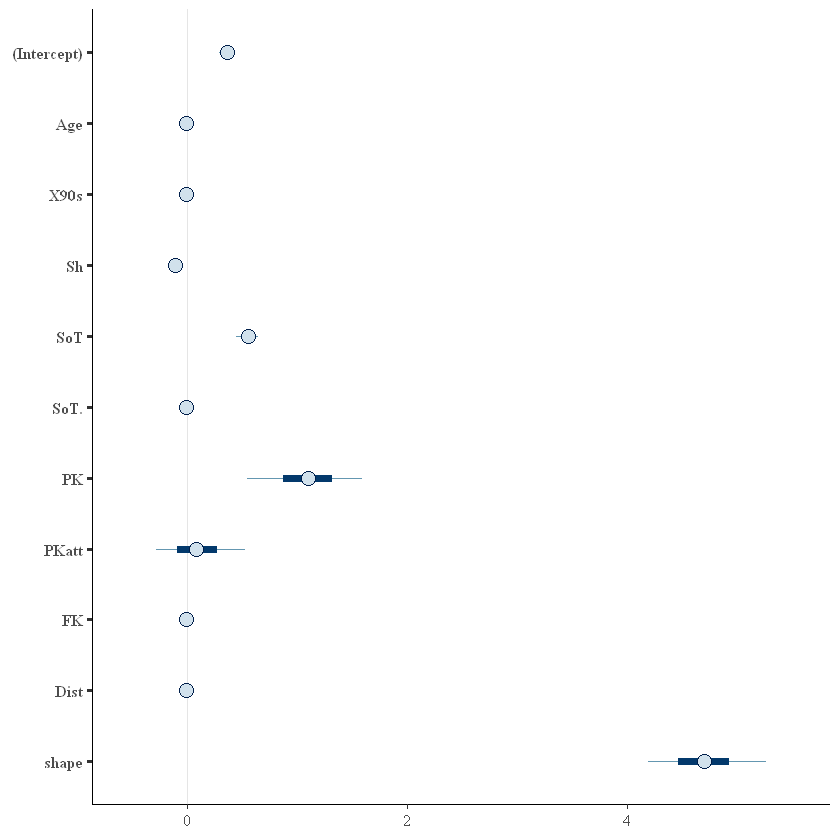

In [10]:
set.seed(123) # for reproducibility
selected_features <- colnames(predictors)
index <- createDataPartition(shooting$Gls, p = 0.8, list = FALSE)
train_data <- shooting[index, ]
test_data <- shooting[-index, ]

bayesian_model <- stan_glm(Gls ~ Age + X90s + Sh + SoT + SoT. + PK + PKatt + FK + X90s + Dist, 
                           data = train_data, 
                           family = Gamma(link = "inverse"),  # Exponential distribution is a special case of the Gamma distribution
                           prior = normal(0, 2.5, autoscale = TRUE),  # Normal priors for the coefficients
                           iter = 1000,  # Number of MCMC iterations
                           chains = 4,  # Number of Markov chains
                           seed = 12345)  # For reproducibility

# Summary of the model
summary(bayesian_model)

plot(bayesian_model)

predicted_values <- posterior_predict(bayesian_model)

print(head(predicted_values))


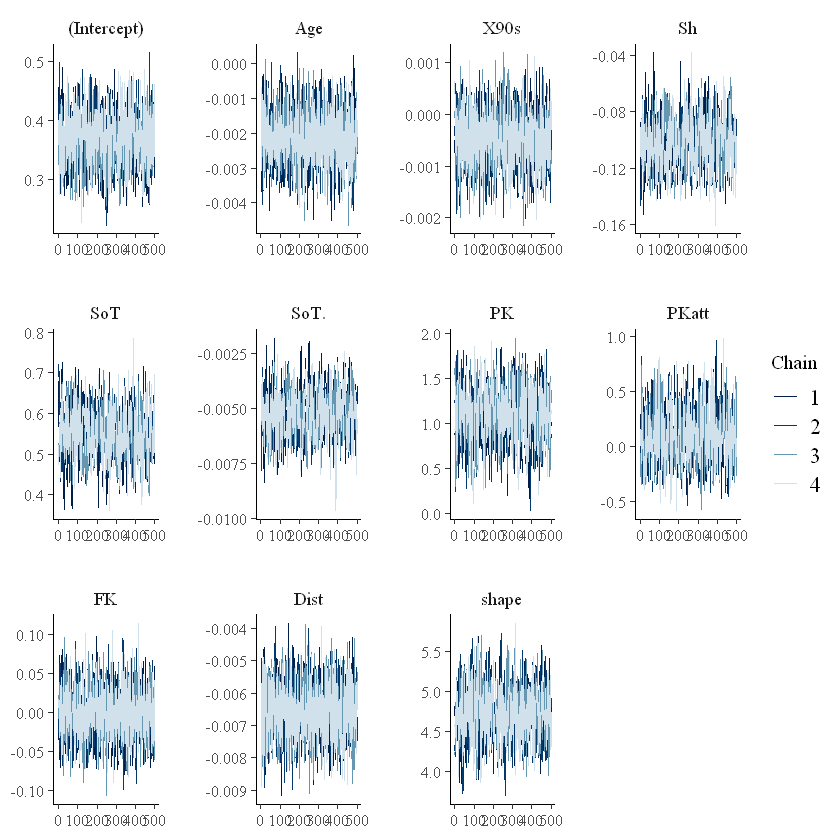

In [11]:
mcmc_trace(bayesian_model)

In [12]:
predicted_values <- posterior_predict(bayesian_model)

In [13]:
predicted_means <- apply(predicted_values, 1, mean)  # Taking the mean of predictions across all posterior samples

In [14]:
actual_values <- test_data$Gls

# MSE
mse <- mean((predicted_means - actual_values)^2)

# RMSE
rmse <- sqrt(mse)

# MAE
mae <- mean(abs(predicted_means - actual_values))

# Print the results
print(paste("MSE:", mse))
print(paste("RMSE:", rmse))
print(paste("MAE:", mae))


Warning message in predicted_means - actual_values:
"longer object length is not a multiple of shorter object length"
Warning message in predicted_means - actual_values:
"longer object length is not a multiple of shorter object length"


[1] "MSE: 43.8351856716206"
[1] "RMSE: 6.62081457764984"
[1] "MAE: 4.50268787264241"


Warning message:
"The following arguments were unrecognized and ignored: type, nsims, binwidth"


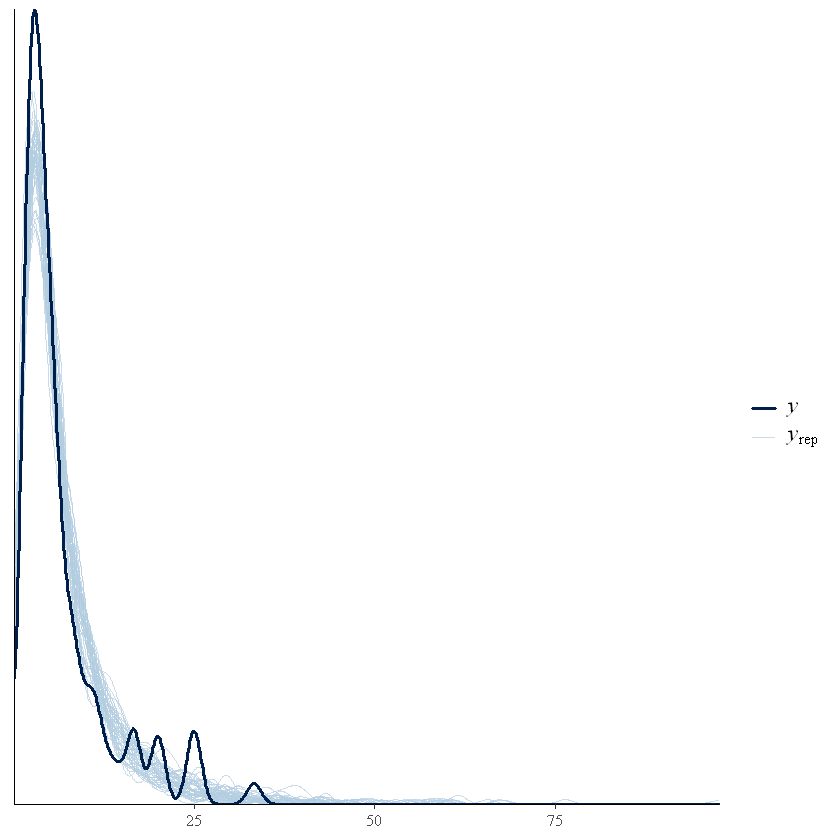

In [15]:
library(bayesplot)
pp_check(bayesian_model, type = "hist", nsims = 50, binwidth = 0.1)